<a href="https://colab.research.google.com/github/dariobublitz/DS/blob/main/Segunda_pre_entrega_del_proyecto_final_es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![An image](https://drive.google.com/uc?export=view&id=1-X6Kj2IJVsdWEaoSnNvDjpdZS3G6GuIR)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title #import dataset <a href="https://drive.google.com/file/d/1Uw0az3cLA1MRTKeb4YUdRe40yxe0uFwo/view?usp=share_link"><br>link</a> 
#/content/drive/MyDrive/colab/housing.csv
import os
import pandas as pd
import numpy as np
import gdown
file_path = '/content/drive/MyDrive/colab/housing.csv'
file_id = '1Uw0az3cLA1MRTKeb4YUdRe40yxe0uFwo'
# en Google, la URL será similar a esta:https://docs.google.com/document/d/FILE_ID/edit
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV-Price']
if os.path.exists(file_path):
    boston = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=column_names)
else:
    gdown.download(f'https://drive.google.com/uc?id={file_id}', 'housing.csv', quiet=False)
    boston = pd.read_csv('housing.csv',delimiter=r"\s+", names=column_names)
#La función gdown.download se utiliza para descargar archivos desde Google Drive. La función toma tres argumentos en este caso:
#La URL de descarga directa del archivo, que se construye utilizando la variable file_id en el formato https://drive.google.com/uc?id={file_id}.
#El nombre del archivo de destino en el sistema de archivos local. En este caso, es 'Bank_Customer_Churn_Prediction.csv'.
#quiet=False: Este argumento controla si la función muestra una barra de progreso 
#----------------
boston2_df = boston.copy() #para hacer la segunda parte
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV-Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.shape

(506, 14)

![An image](https://drive.google.com/uc?export=view&id=1-b9DVeaizUReMoBXsT88JUbnkndI6udB)

![An image](https://drive.google.com/uc?export=view&id=1-iWtOEjG4eSOVpsS9WST9asyTyvD5X-9)

# <font color='yellow'>1. INTRODUCCIÓN:

Con el objetivo de establecer una agencia inmobiliaria que utilice inteligencia artificial para predecir los precios de la vivienda, se analiza el conjunto de datos de viviendas de Boston. El conjunto de datos de viviendas de Boston se deriva de la información recopilada por la Oficina del Censo de los EE. UU. sobre viviendas en el área de Boston, MA.


## Las preguntas que estamos considerando son:

1. ¿Qué variables tienen más valores atípicos?
2. ¿Existen variables que se asemejen a distribuciones normales?
3. ¿Hay distribuciones sesgadas a la derecha o a la izquierda?
4. ¿Qué método es útil para "corregir" el sesgo?
5. ¿Corregir el sesgo ayuda a predecir mejor?
6. ¿Qué efecto tiene la reducción de la dimensionalidad del conjunto de datos?
7. ¿Cuáles son las métricas más eficientes para validar el modelo?

## ¿Quiénes pueden beneficiarse de esta información?

1. Los interesados en la startup.
2. Los futuros clientes que invertirán menos tiempo.
3. Lograr una mejor experiencia de usuario al filtrar adecuadamente las viviendas según las preferencias de cada cliente, aumentar las ventas y reducir la necesidad de horas de trabajo de los agentes dedicadas a mostrar propiedades(lo que aumenta la rentabilidad de la inmobiliaria).





# <font color='yellow'>2. EDA:

## Las columnas del conjunto de datos se describen a continuación:

* **CRIM** - tasa de criminalidad per cápita por ciudad

* **ZN** - proporción de tierras residenciales destinadas a lotes de más de 25,000 pies cuadrados.

* **INDUS** - proporción de acres de negocios no minoristas por ciudad.

* **CHAS** - variable ficticia del río Charles (1 si el sector limita con el río; 0 en caso contrario)

* **NOX** - concentración de óxidos de nitrógeno (partes por 10 millones)

* **RM** - número promedio de habitaciones por vivienda

* **AGE** - proporción de unidades ocupadas por sus propietarios construidas antes de 1940

* **DIS** - distancias ponderadas a cinco centros de empleo de Boston

* **RAD** - índice de accesibilidad a autopistas radiales

* **TAX** - tasa de impuesto a la propiedad de valor total por cada $10,000

* **PTRATIO** - proporción alumno-profesor por ciudad

* **B** - 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de raza negra por ciudad

* **LSTAT** - % de población de menor estatus

* **MEDV** - Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares

In [ ]:
boston.shape

(506, 14)

In [ ]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Desde el principio, dos columnas de datos muestran resúmenes interesantes. Estas son: ZN (proporción de tierras residenciales destinadas a lotes de más de 25,000 pies cuadrados) con 0 para los percentiles 25 y 50. En segundo lugar, CHAS: variable ficticia del río Charles (1 si el área limita con el río; 0 en caso contrario) con 0 para los percentiles 25, 50 y 75. Estos resúmenes son comprensibles, ya que ambas variables son condicionales y categóricas. La primera suposición sería que estas columnas podrían no ser útiles en una tarea de regresión, como predecir MEDV (valor mediano de las viviendas ocupadas por sus propietarios).

Otro hecho interesante en el conjunto de datos es el valor máximo de MEDV. Según la descripción original de los datos, dice: La variable #14 parece estar censurada en 50.00 (correspondiente a un precio mediano de $50,000). Basándonos en eso, los valores por encima de 50.00 podrían no ayudar a predecir MEDV. Grafiquemos el conjunto de datos y veamos tendencias/estadísticas interesantes.

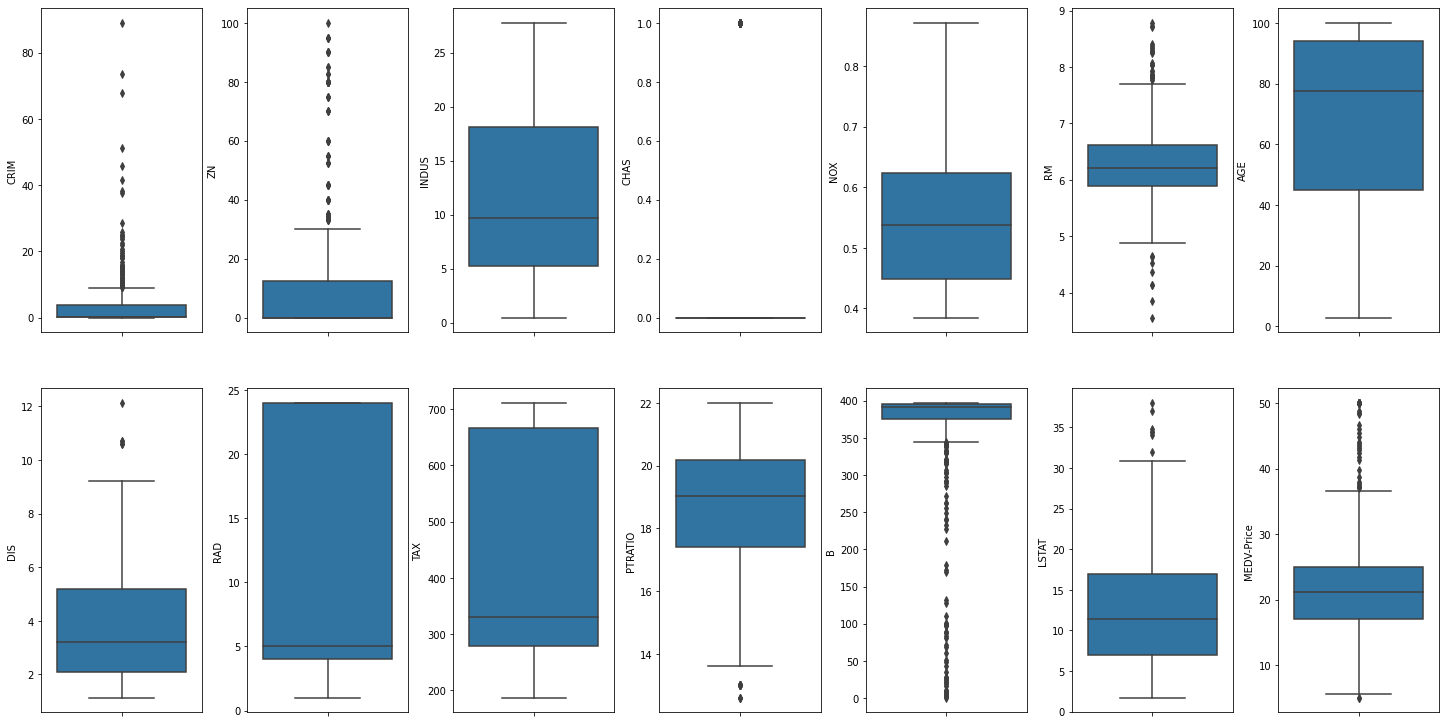

In [ ]:
#@title # Boxplot
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columnas como CRIM, ZN, RM y B parecen tener valores atípicos. Veamos el porcentaje de valores atípicos en cada columna.

(No podemos tener en cuenta la variable CHAS en este análisis porque es una variable dicotómica.)

# <font color='yellow'> 3. DATA PREPROCESSING:

In [ ]:
#@title %s Outliers
for k, v in boston.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV-Price outliers = 7.91%


In [ ]:
boston.shape

(506, 14)

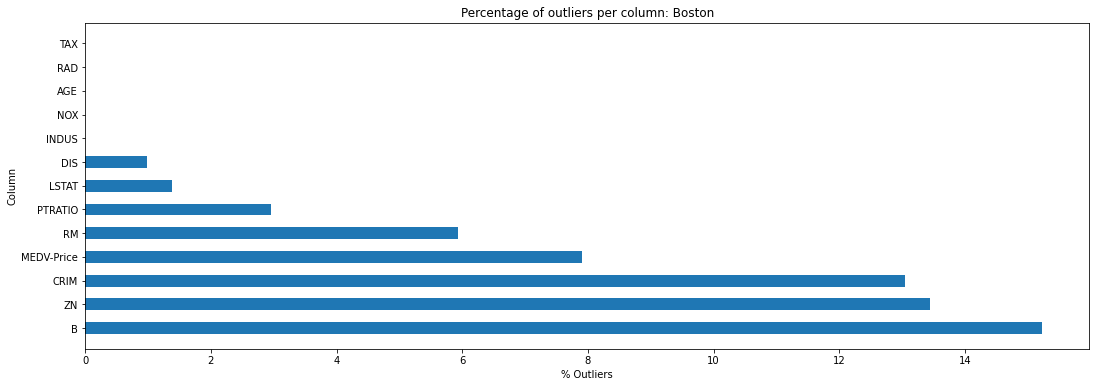

In [ ]:
#@title %s Outliers Boston 
outliers_dict_boston = {}
for k, v in boston.items():
  if k!='CHAS':
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = len(v_col)/len(boston)*100
    outliers_dict_boston[k] = perc

sorted_outliers = sorted(outliers_dict_boston.items(), key=lambda x: x[1], reverse=True)
fig, ax = plt.subplots(figsize=(18, 6))

ax.barh([x[0] for x in sorted_outliers], [x[1] for x in sorted_outliers], height=0.5)
ax.set_title("Percentage of outliers per column: Boston")
ax.set_xlabel("% Outliers")
ax.set_ylabel("Column")
plt.show()

Eliminemos los valores atípicos de MEDV (MEDV >= 50.0) antes de graficar más distribuciones.

In [ ]:
boston_trunc = boston[~(boston['MEDV-Price'] >= 50.0)]
print(np.shape(boston_trunc))

(490, 14)


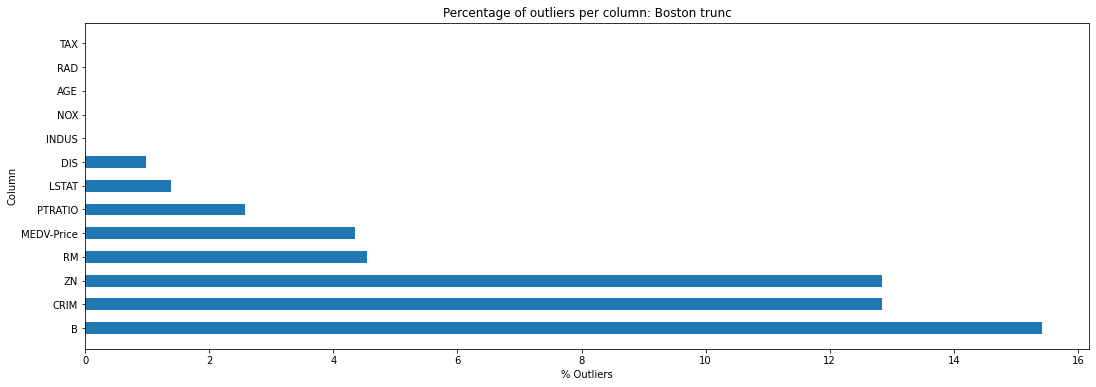

In [ ]:
#@title %s Outliers Boston trunc
outliers_dict_boston_trunc = {}
for k, v in boston_trunc.items():
  if k!='CHAS':
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = len(v_col)/len(boston)*100
    outliers_dict_boston_trunc[k] = perc

sorted_outliers = sorted(outliers_dict_boston_trunc.items(), key=lambda x: x[1], reverse=True)
fig, ax = plt.subplots(figsize=(18, 6))

ax.barh([x[0] for x in sorted_outliers], [x[1] for x in sorted_outliers], height=0.5)
ax.set_title("Percentage of outliers per column: Boston trunc")
ax.set_xlabel("% Outliers")
ax.set_ylabel("Column")
plt.show()

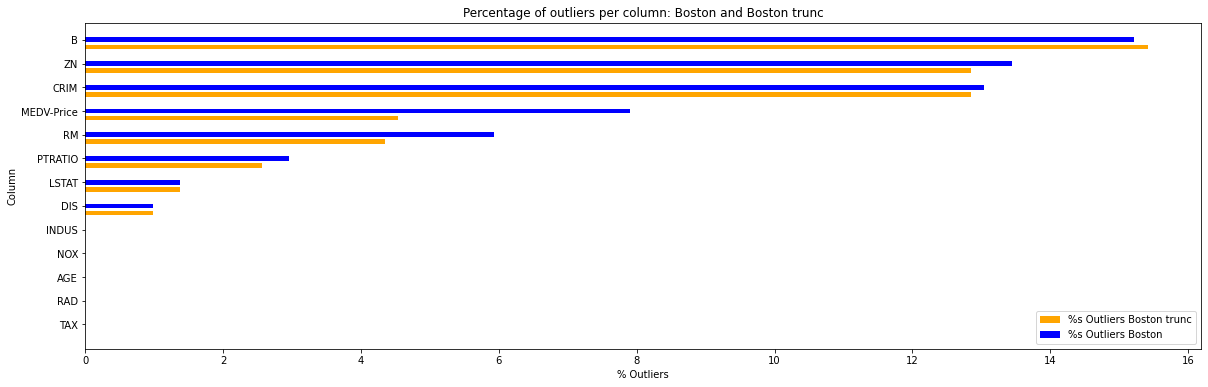

In [ ]:
#@title # <font color='yellow'>Percentage of outliers per column: <br>Boston and Boston trunc 
fig, ax = plt.subplots(figsize=(20, 6))
# Grafico para %s Outliers Boston trunc
outliers_dict_boston_trunc = {}
for k, v in boston_trunc.items():
    if k!='CHAS':
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = len(v_col)/len(boston)*100
        outliers_dict_boston_trunc[k] = perc
sorted_outliers = sorted(outliers_dict_boston_trunc.items(), key=lambda x: x[1], reverse=True)
# Ajuste de posición para barras naranjas
n = len(sorted_outliers)
y = np.arange(n) + 0.3 
ax.barh(y, [x[1] for x in sorted_outliers], height=0.2, color='orange', label='%s Outliers Boston trunc')
# Grafico para %s Outliers Boston
outliers_dict_boston = {}
for k, v in boston.items():
    if k!='CHAS':
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = len(v_col)/len(boston)*100
        outliers_dict_boston[k] = perc
sorted_outliers = sorted(outliers_dict_boston.items(), key=lambda x: x[1], reverse=True)
ax.barh([x[0] for x in sorted_outliers], [x[1] for x in sorted_outliers], height=0.2, color='blue', label='%s Outliers Boston')
ax.set_title("Percentage of outliers per column: Boston and Boston trunc")
ax.set_xlabel("% Outliers")
ax.set_ylabel("Column")
# Leyenda y ajuste de posición
ax.legend(loc='lower right')
ax.invert_yaxis()
plt.show()


Al truncar el conjunto de datos de Boston, se reduce el número de valores atípicos en ZN, CRIM, RM y PTRATIO.

Veamos cómo se ven las distribuciones de estas características junto con MEDV.

# <font color='yellow'>4. MODEL SELECTION AND TRAINIG:

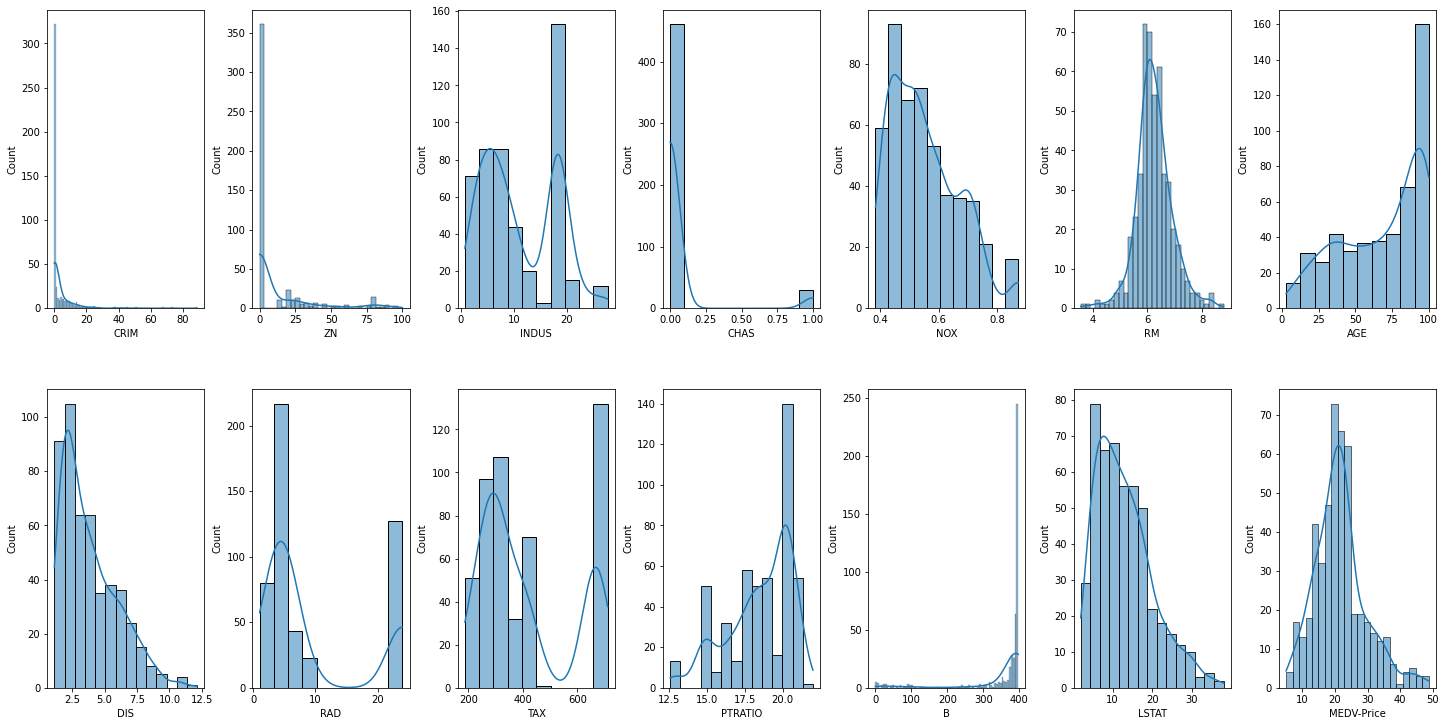

In [ ]:
#@title # features look along with MEDV.
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in boston_trunc.items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

El histograma también muestra que las columnas CRIM, ZN y B tienen distribuciones altamente sesgadas. Además, MEDV parece tener una distribución normal (las predicciones), y otras columnas parecen tener una distribución de datos normal o bimodal, excepto para CHAS (que es una variable discreta).

<Axes: >

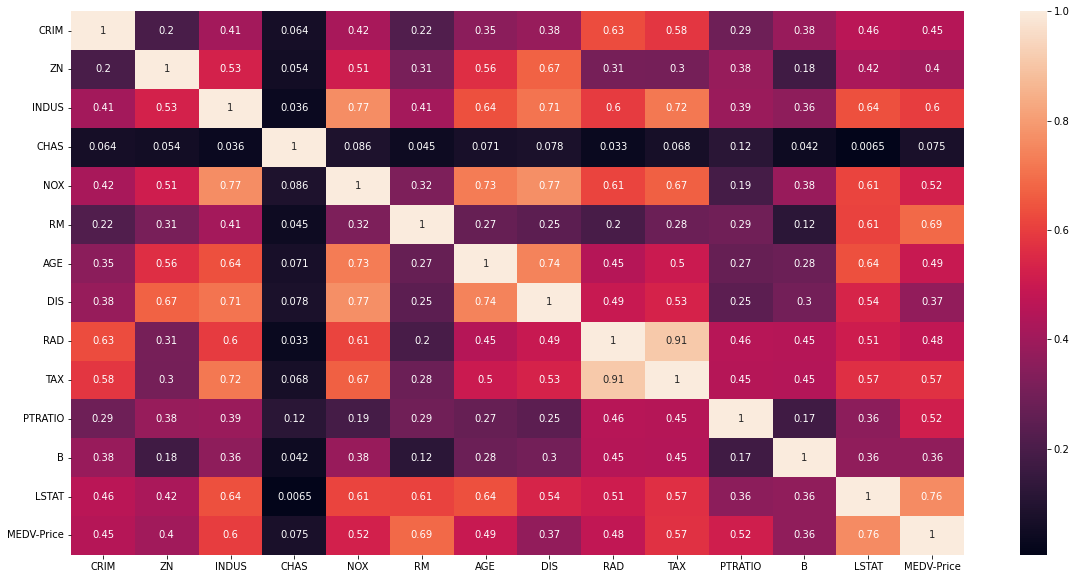

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston_trunc.corr().abs(),  annot=True)

A partir de la matriz de correlación, vemos que TAX y RAD son características altamente correlacionadas. Las columnas LSTAT, INDUS, RM, TAX, NOX y PTRAIO tienen un puntaje de correlación mayor a 0.5 con MEDV, lo cual es una buena indicación para utilizarlos como predictores. Grafiquemos estas columnas en función de MEDV.

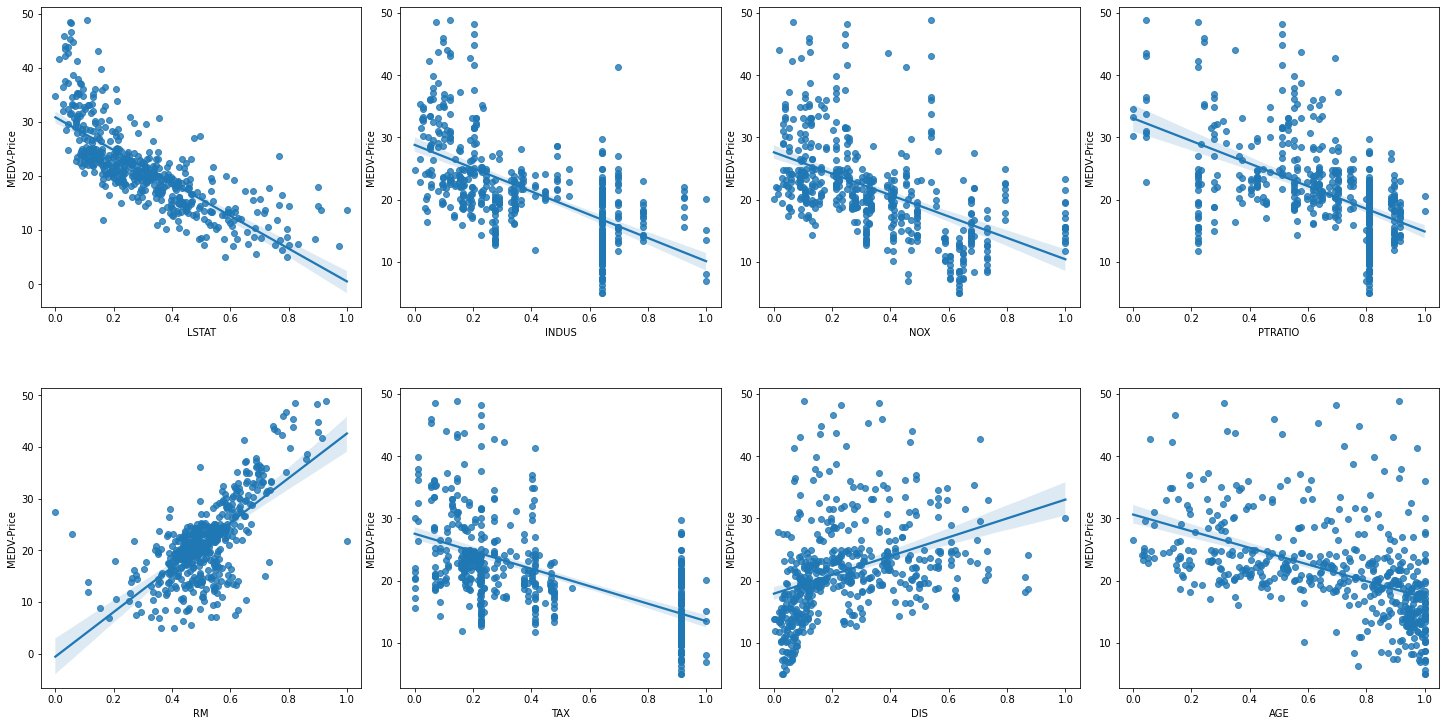

In [ ]:
#@title # plot these columns 'boston_trunc' against MEDV.
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x1 = boston_trunc.loc[:,column_sels]
y1 = boston_trunc['MEDV-Price']
x1 = pd.DataFrame(data=min_max_scaler.fit_transform(x1), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y1, x=x1[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
x1.shape, y1.shape

((490, 8), (490,))

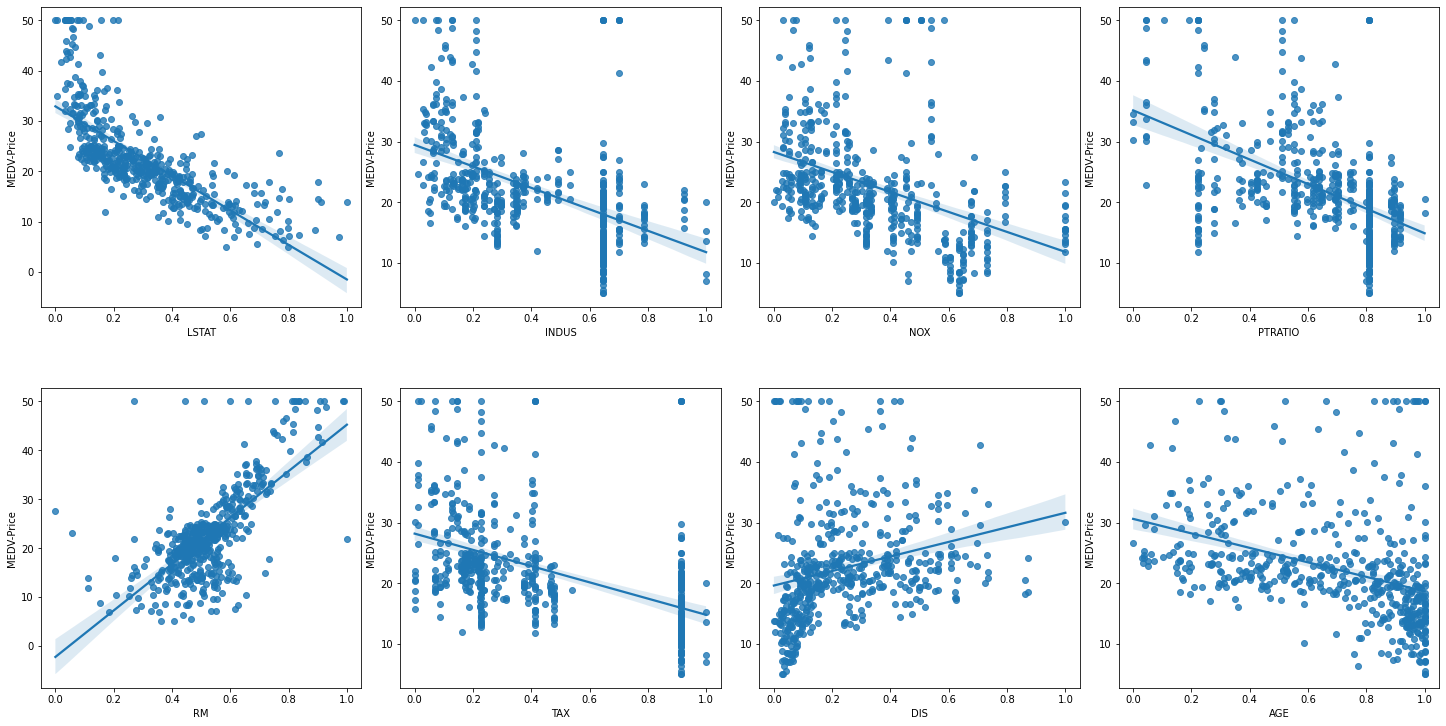

In [ ]:
#@title # plot these columns 'boston' against MEDV.
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x2 = boston.loc[:,column_sels]
y2 = boston['MEDV-Price']
x2 = pd.DataFrame(data=min_max_scaler.fit_transform(x2), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y2, x=x2[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

----------

In [ ]:
x2.shape,y2.shape

((506, 8), (506,))

In [ ]:
#@title # Los valores de MSE y su desviación estándar para cada modelo<br>(linear regression, Ridge regression, and polynomial Ridge regression).<br> <font color='yellow'> 'boston'
from sklearn import datasets, linear_model
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
scores = cross_val_score(l_regression, x_scaled, y2, cv=kf, scoring='neg_mean_squared_error')
print("MSE kf: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y2, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE l_ridge: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
for degree in range(2, 6):
   model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
   scores = cross_val_score(model, x_scaled, y2, cv=kf, scoring='neg_mean_squared_error')
   print("MSE"+str(degree)+": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y2, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE degree=3: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

MSE kf: -34.9385 (+/- 44.5937)
MSE l_ridge: -32.5637 (+/- 38.7249)
MSE2: -22.9384 (+/- 30.5660)
MSE3: -21.3311 (+/- 25.7703)
MSE4: -21.7632 (+/- 24.9174)
MSE5: -22.1760 (+/- 24.8349)
MSE degree=3: -21.3311 (+/- 25.7703)


In [ ]:
x1.shape,y1.shape

((490, 8), (490,))

In [ ]:
#@title # Los valores de MSE y su desviación estándar para cada modelo<br> (linear regression, Ridge regression, and polynomial Ridge regression).<br> <font color='yellow'> 'boston_trunc'
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
scores = cross_val_score(l_regression, x_scaled, y1, cv=kf, scoring='neg_mean_squared_error')
print("MSE kf : %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y1, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE l_ridge: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
for degree in range(2, 6):
   model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
   scores = cross_val_score(model, x_scaled, y1, cv=kf, scoring='neg_mean_squared_error')
   print("MSE"+str(degree)+": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y1, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE degree=3: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

MSE kf : -21.4803 (+/- 18.1477)
MSE l_ridge: -20.0839 (+/- 13.0037)
MSE2: -14.2340 (+/- 8.3601)
MSE3: -13.6128 (+/- 6.7814)
MSE4: -14.0885 (+/- 7.2530)
MSE5: -14.2686 (+/- 7.5890)
MSE degree=3: -13.6128 (+/- 6.7814)


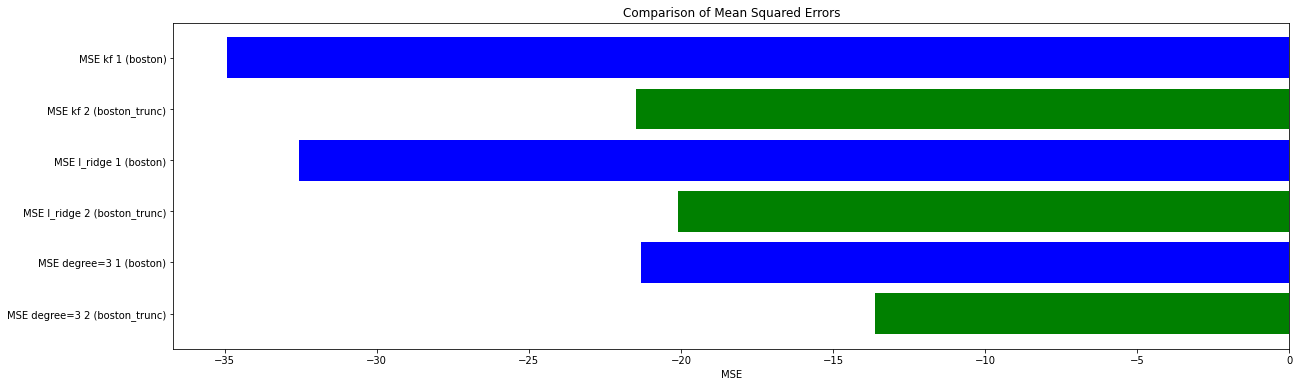

In [ ]:
#@title # Comparación de errores cuadráticos medios<br> <font color='yellow'> 'boston_trunc' vs 'boston'
import matplotlib.pyplot as plt
import numpy as np

# Set data
MSE_kf1 = -34.9385
MSE_kf2 = -21.4803
MSE_l_ridge1 = -32.5637
MSE_l_ridge2 = -20.0839
MSE_degree_3_1 = -21.3311
MSE_degree_3_2 = -13.6128

# Create horizontal bar plot for MSE
fig, ax = plt.subplots(figsize=(20, 6))
y_pos = np.arange(6)
MSE = [MSE_kf1, MSE_kf2, MSE_l_ridge1, MSE_l_ridge2, MSE_degree_3_1, MSE_degree_3_2]
ax.barh(y_pos, MSE, align='center', color=['blue', 'green', 'blue', 'green', 'blue', 'green'])
ax.set_yticks(y_pos)
ax.set_yticklabels(['MSE kf 1 (boston)', 'MSE kf 2 (boston_trunc)', 'MSE l_ridge 1 (boston)', 'MSE l_ridge 2 (boston_trunc)', 'MSE degree=3 1 (boston)', 'MSE degree=3 2 (boston_trunc)'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('MSE')
ax.set_title('Comparison of Mean Squared Errors')

plt.show()


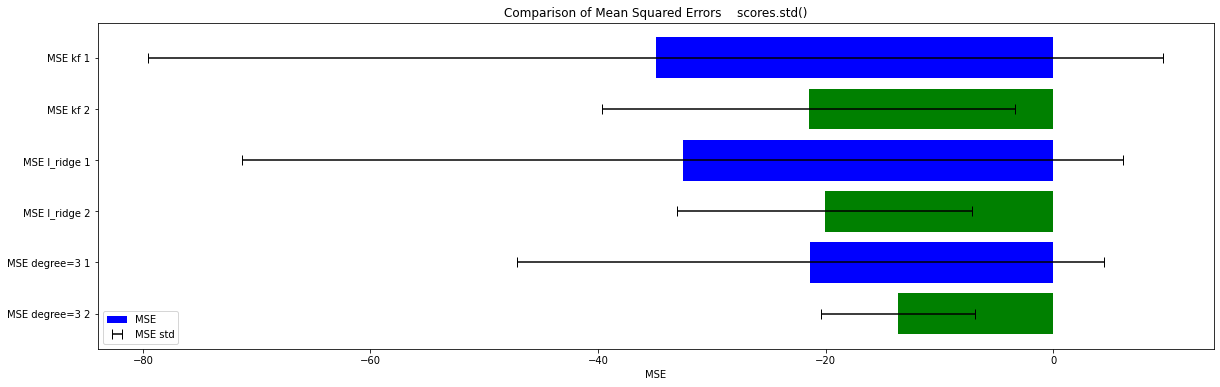

In [ ]:
#@title # Comparación de errores cuadráticos medios y su desviación estándar 
import matplotlib.pyplot as plt
import numpy as np

# Set data
MSE_kf = [-34.9385, -21.4803]
MSE_kf_std = [44.5937, 18.1477]
MSE_l_ridge = [-32.5637, -20.0839]
MSE_l_ridge_std = [38.7249, 13.0037]
MSE_degree_3 = [-21.3311, -13.6128]
MSE_degree_3_std = [25.7703, 6.7814]

# Create horizontal bar plot for MSE
fig, ax = plt.subplots(figsize=(20, 6))
y_pos = np.arange(6)
MSE = [MSE_kf[0], MSE_kf[1], MSE_l_ridge[0], MSE_l_ridge[1], MSE_degree_3[0], MSE_degree_3[1]]
ax.barh(y_pos, MSE, align='center', color=['blue', 'green', 'blue', 'green', 'blue', 'green'], label='MSE')
ax.set_yticks(y_pos)
ax.set_yticklabels(['MSE kf 1', 'MSE kf 2', 'MSE l_ridge 1', 'MSE l_ridge 2', 'MSE degree=3 1', 'MSE degree=3 2'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('MSE')
ax.set_title('Comparison of Mean Squared Errors    scores.std()')

# Add error bars for MSE
ax.errorbar(MSE, y_pos, xerr=[MSE_kf_std[0], MSE_kf_std[1], MSE_l_ridge_std[0], MSE_l_ridge_std[1], MSE_degree_3_std[0], MSE_degree_3_std[1]], fmt='none', color='black', capsize=5, label='MSE std')

ax.legend()
plt.show()

* Eliminar los valores atípicos fue una buena práctica, ya que reduce 'scores.mean()' y 'scores.std()'.

* De los tres métodos, PolynomialFeatures funciona mejor.

## ¿Existe alguna técnica que mejore aún más el rendimiento?
Intentemos eliminar el sesgo de los datos mediante la transformación logarítmica.

In [ ]:
#@title #remove the skewness
import pandas as pd
x1l=pd.DataFrame()
y =  np.log1p(y1)
for col in x1.columns:
    if np.abs(x1[col].skew()) > 0.3:
        x1l[col] = np.log1p(x1[col])

Este código aplica la transformación logarítmica log1p a la variable objetivo y a las características del DataFrame x que tienen una distribución sesgada. La transformación logarítmica es una técnica común para reducir el sesgo en los datos y mejorar el rendimiento de los modelos de regresión.

In [ ]:
x1l.shape,y.shape

((490, 7), (490,))

In [ ]:
x1l.head()

,LSTAT,INDUS,NOX,PTRATIO,TAX,DIS,AGE
0,0.080064,0.056520,0.273696,0.252496,0.188979,0.238001,0.495675
1,0.181441,0.210621,0.159428,0.440312,0.099811,0.299010,0.578128
2,0.055397,0.210621,0.159428,0.440312,0.099811,0.299010,0.469617
3,0.026325,0.051960,0.139941,0.500130,0.064658,0.370303,0.365901
4,0.089001,0.051960,0.139941,0.500130,0.064658,0.370303,0.424170


In [ ]:
y

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: MEDV-Price, Length: 490, dtype: float64

# <FONT COLOR='YELLOW'>5. VALIDATION AND EVALUATION OF THE MODEL:

In [ ]:
#@title # Los valores del MSE y su desviación estándar para cada modelo<br> (linear regression, Ridge regression, and polynomial Ridge regression).<br> <font color='yellow'> 'log_boston_trunc'
from sklearn import datasets, linear_model
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1l)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE kf: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE l_ridge: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
for degree in range(2,10):
   model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
   scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
   print("MSE"+str(degree)+": %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=7), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE degree=7: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

MSE kf: -0.0389 (+/- 0.0237)
MSE l_ridge: -0.0390 (+/- 0.0251)
MSE2: -0.0409 (+/- 0.0205)
MSE3: -0.0412 (+/- 0.0192)
MSE4: -0.0406 (+/- 0.0179)
MSE5: -0.0392 (+/- 0.0160)
MSE6: -0.0379 (+/- 0.0155)
MSE7: -0.0376 (+/- 0.0168)
MSE8: -0.0386 (+/- 0.0192)
MSE9: -0.0407 (+/- 0.0226)
MSE degree=7: -0.0376 (+/- 0.0168)


polynomial regression with degree=7 has a better MSE.

## Probemos algunas técnicas de regresión no paramétrica:
 SVR con kernel rbf, DecisionTreeRegressor, KNeighborsRegressor, etc.

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Best classifier : SVR(C=100.0, gamma=0.1)
MSE: -0.0369 (+/- 0.0166)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Best classifier : DecisionTreeRegressor(max_depth=4)
MSE: -0.0536 (+/- 0.0266)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Best classifier : KNeighborsRegressor(n_neighbors=7)
KNN Accuracy: -0.0514 (+/- 0.0208)


En comparación con los tres modelos que se eligen a través de la búsqueda en cuadrícula, SVR funciona mejor. Finalmente, intentemos un método de conjunto.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Best classifier : GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=9,
                          random_state=30)
MSE: -0.0364 (+/- 0.0179)


## Distribución de MSE de estos modelos con k-fold=10

<Axes: >

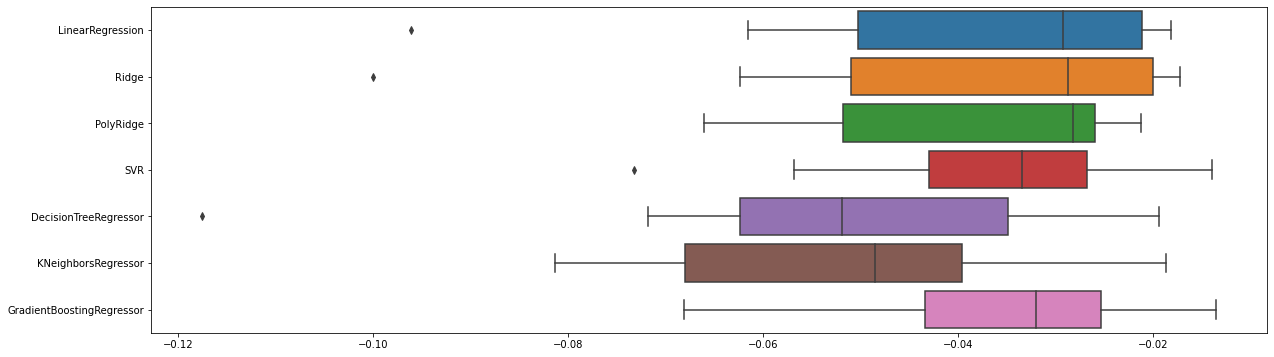

In [ ]:
#@title #<font color='yellow'>Grafiquemos los resultados de k-fold para ver qué modelo tiene una mejor distribución de resultados.<br>Echemos un vistazo a la distribución de MSE de estos modelos con k-fold=10</font><br>1/2
plt.figure(figsize=(20, 6))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map,orient='h')

In [ ]:
#@title #<font color='yellow'>Echemos un vistazo a la distribución de MSE de estos modelos con k-fold=10<br>Grafiquemos los resultados de k-fold para ver qué modelo tiene una mejor distribución de resultados.



.<br> Let's have a look at the MSE distribution of these models with k-fold=10</font><br>2/2

import pandas as pd
import plotly.graph_objs as go
import plotly.express as px


fig = go.Figure()
fig.update_layout(width=1200, height=500)
fig.update_layout(
    title={
        'text': "Mean Squared Error (MSE) Distribution of Models with K-Fold=10",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
a = scores_map['GradientBoostingRegressor']
b = scores_map['SVR']
c = scores_map['LinearRegression']
d = scores_map['Ridge']
e = scores_map['PolyRidge']
f = scores_map['DecisionTreeRegressor']
g = scores_map['KNeighborsRegressor']
fig.add_trace(go.Box(x=a, name='GradientBoostingRegressor'))
fig.add_trace(go.Box(x=b, name='SVR'))
fig.add_trace(go.Box(x=c, name='LinearRegression'))
fig.add_trace(go.Box(x=d, name='Ridge'))
fig.add_trace(go.Box(x=e, name='PolyRidge'))
fig.add_trace(go.Box(x=f, name='DecisionTreeRegressor'))
fig.add_trace(go.Box(x=g, name='KNeighborsRegressor'))
fig.show()



## <font color='yellow'>¿Cómo afecta la modificación de la forma de los datos y la precisión al aplicar la transformación logarítmica?

Una función llamada `forward_selection` que realiza la selección de características hacia adelante utilizando el criterio de significación estadística (valor p). La selección de características es un proceso para seleccionar las características más relevantes de un conjunto de datos, lo que puede mejorar la eficiencia y precisión de los modelos de aprendizaje automático.

Usemos `forward_selection` antes y después de aplicar logaritmos:

In [ ]:
#@title # `forward_selection`
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features,dtype=float)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
boston2_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV-Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
boston2_df_trunc = boston2_df[~(boston2_df['MEDV-Price'] >= 50.0)]
print(np.shape(boston2_df_trunc))

(490, 14)


In [ ]:
boston2_df_trunc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV-Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
x4 = boston2_df_trunc.drop('MEDV-Price', axis=1)
y4 = boston2_df_trunc['MEDV-Price']

In [ ]:
#@title #Before
forward_selection(x4,y4)

['LSTAT', 'RM', 'PTRATIO', 'TAX', 'B', 'RAD', 'DIS', 'NOX', 'CRIM', 'ZN']

In [ ]:
boston3_df_trunc=boston2_df_trunc.copy
log_boston3_df_trunc=pd.DataFrame()
sesgado=[] #Verifica que variable es apta para el tratamiento con el log
for col in boston2_df_trunc.columns:
    if np.abs(boston2_df_trunc[col].skew()) > 0.3:
        log_boston3_df_trunc[col] = np.log1p(boston2_df_trunc[col])
        sesgado.append(col)
    else:
       log_boston3_df_trunc[col] = boston2_df_trunc[col]    

In [ ]:
logx4 = log_boston3_df_trunc.drop('MEDV-Price', axis=1)
logy4 = log_boston3_df_trunc['MEDV-Price']

In [ ]:
logx4.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006300,2.944439,1.196948,0.0,0.430483,6.575,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421
1,0.026944,0.000000,2.088153,0.0,0.384582,6.421,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488
2,0.026924,0.000000,2.088153,0.0,0.384582,7.185,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420
3,0.031857,0.000000,1.156881,0.0,0.377066,6.998,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181
4,0.066770,0.000000,1.156881,0.0,0.377066,7.147,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300


In [ ]:
logy4.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: MEDV-Price, dtype: float64

In [ ]:
#@title #After
forward_selection(logx4,logy4)

['LSTAT', 'CRIM', 'PTRATIO', 'RAD', 'RM', 'DIS', 'TAX', 'B', 'NOX']

# Transformador que realiza la selección secuencial de características.

Este Selector de características secuenciales agrega (selección hacia adelante) o elimina (selección hacia atrás) características para formar un subconjunto de características de manera codiciosa. En cada etapa, este estimador elige la mejor característica para agregar o eliminar según la puntuación de validación cruzada de un estimador.

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#@title ##SequentialFeatureSelector( )
#!pip install -U mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(x4, y4)            #variables normales
sfs.k_feature_names_ ,sfs.k_score_    #Lista final de features

(('NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'),
 0.7625915680333534)

In [ ]:
sfs.fit(logx4, logy4)          #variables transformadas por el log
sfs.k_feature_names_ ,sfs.k_score_    #Lista final de features

(('CRIM', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'),
 0.7926776051180967)

In [ ]:
r2_normal = 0.7625915680333534
r2_log = 0.7926776051180967
r2_log-r2_normal # Mejora de R2 del modelo (R2 puede ser diferente cada vez que corremos el algoritmo)

0.030086037084743333

In [ ]:
len(sesgado)

13

# <font color='yellow'>6. CONCLUSIONES:
* `GradientBoostingRegressor y SVR` fueron las dos técnicas que arrojaron los mejores resultados en la reducción del MSE.
* Aplicar corrección logarítmica a variables sesgadas conduce a una mejora en R2.